<a href="https://colab.research.google.com/github/abdyraman/eye-deseases-mobilenetv1/blob/main/eye_deseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# Random Module
import random

# Data manipulation and linear algebra
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2

# Neural network API
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.model_selection import train_test_split

At first, we notice that the data is about images that were taken to the retina of people that have different eye disease and normal eyes, either left or right eye. We have 4 classifications:

Cataracts
Diabetic_retinopathy
Glaucoma
Normal
The porpuse of this notebook is to make an algorithm that can predict what of these different eye disease does the patient have given the image presented

We are going to show some examples of each desease and normal eyes

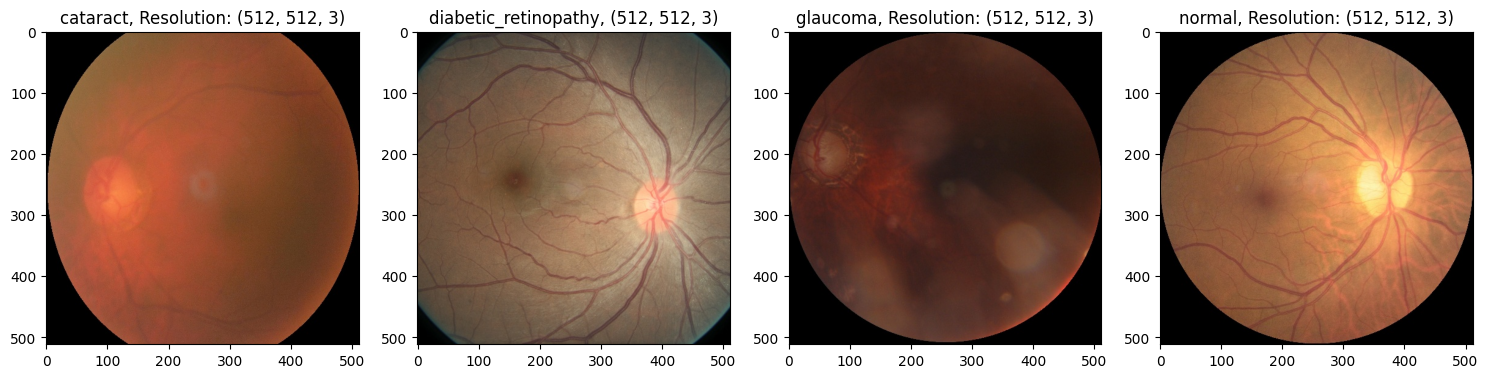

In [3]:
fig, ax = plt.subplots(1,4, figsize=(15,8))
# Cataract Image
cataract_img = mpimage.imread('/content/drive/MyDrive/dataset/normal/2341_left.jpg')
ax[0].imshow(cataract_img)
ax[0].set_title(f'cataract, Resolution: {cataract_img.shape}')

# Diabetic_retinopathy
diabetic_retinopathy_img = mpimage.imread('/content/drive/MyDrive/dataset/diabetic_retinopathy/10009_left.jpeg')
ax[1].imshow(diabetic_retinopathy_img)
ax[1].set_title(f'diabetic_retinopathy, {diabetic_retinopathy_img.shape}')

# Glaucoma Image
glaucoma_img = mpimage.imread('/content/drive/MyDrive/dataset/glaucoma/1213_left.jpg')
ax[2].imshow(glaucoma_img)
ax[2].set_title(f'glaucoma, Resolution: {glaucoma_img.shape}')

# Normal Image
normal_img = mpimage.imread('/content/drive/MyDrive/dataset/normal/2334_right.jpg')
ax[3].imshow(normal_img)
ax[3].set_title(f'normal, Resolution: {normal_img.shape}')

plt.tight_layout()
plt.show()

In [4]:
def save_images(path_dir):
    images = []
    for jpg in os.listdir(path_dir):
        image_high_resolution = cv2.imread(f'{path_dir}/{jpg}')
        image_change_color = cv2.cvtColor(image_high_resolution, cv2.COLOR_BGR2RGB)
        image_low_resolution = cv2.resize(image_change_color, (200, 200))
        images.append(image_low_resolution)

    return np.asarray(images)

## Now, we are going to divide the images in carpets of Training and Test

In [5]:
!mkdir ../model && mkdir ../model/Train && mkdir ../model/Test

In [6]:
# Create de directories for the datasets of Training
!mkdir ../model/Train/cataract && mkdir ../model/Train/glaucoma \
&& mkdir ../model/Train/diabetic_retinopathy && mkdir ../model/Train/normal

In [7]:
# Create de directories for the datasets of Test
!mkdir ../model/Test/cataract && mkdir ../model/Test/glaucoma \
&& mkdir ../model/Test/diabetic_retinopathy && mkdir ../model/Test/normal

In [8]:
# Load the images in memory for make carpets thus we can divided in two different sets of data and can perform a better model
cataract_img = save_images('/content/drive/MyDrive/dataset/cataract')
diabetic_retinopathy_img = save_images('/content/drive/MyDrive/dataset/diabetic_retinopathy')
glaucoma_img = save_images('/content/drive/MyDrive/dataset/glaucoma')
normal_img = save_images('/content/drive/MyDrive/dataset/normal')

# Put toguether all the Matrices in one variable
eye_deseases_img = np.concatenate((cataract_img, glaucoma_img, diabetic_retinopathy_img, normal_img))
label_eye_deseases = np.concatenate((
    np.repeat(0, cataract_img.shape[0]), # Create Label for Cataract
    np.repeat(1, glaucoma_img.shape[0]), # Create Label for Glaucoma
    np.repeat(2, diabetic_retinopathy_img.shape[0]), # Create Label for Diabetic_retinopathy
    np.repeat(3, normal_img.shape[0]) # Create Label for Normal
))

# Create the dict for the labels
dict_labels_eye_deseases = {0:'cataract', 1:'glaucoma', 2:'diabetic_retinopathy', 3:'normal'}

In [9]:
print(f'''Total number of images: {eye_deseases_img.shape[0]}
        Resolution: {eye_deseases_img.shape[1]} x {eye_deseases_img.shape[2]}
        Channels of Color: {eye_deseases_img.shape[3]} (RGB)''')

Total number of images: 4217
        Resolution: 200 x 200
        Channels of Color: 3 (RGB)


### Now that we have all the data and their labels, we are going to do a split in training and testing and then we will save them in their directories

In [10]:
x_train, x_test, y_train, y_test = train_test_split(eye_deseases_img, label_eye_deseases,
                                                    test_size=0.30,
                                                   random_state=2184,
                                                   )

In [11]:
def save_images_directories(x, y, dir_set):
    for i in range(x.shape[0]):
        plt.imsave(f'{dir_set}/{dict_labels_eye_deseases[y[i]]}/{np.random.randint(1000000)}.jpg', x[i]) # Directorie where the image is going to be save, the array

save_images_directories(x_train, y_train, '../model/Train') # Save the images in Train directory
save_images_directories(x_test, y_test, '../model/Test') # Save the images in Test directoriy

## Now that we have all the images in their directories, we are going to prepare the data for the CNN MODEL

### First we are going to make a Data generators so that we have more data for training and testing datasets

In [12]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip=True,
                                  vertical_flip=False)

test_datagen = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  validation_split=0.2)

In [13]:
print('Training Dataset:')
train_generator = train_datagen.flow_from_directory(
    '../model/Train',
    target_size=(200,200),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

print('Validation Dataset:')
validation_generator = test_datagen.flow_from_directory(
    '../model/Test',
    target_size=(200,200),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation'
)

print('Test Dataset:')
test_generator = test_datagen.flow_from_directory(
    '../model/Test',
    target_size=(200,200),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb'
)

Training Dataset:
Found 2951 images belonging to 4 classes.
Validation Dataset:
Found 252 images belonging to 4 classes.
Test Dataset:
Found 1266 images belonging to 4 classes.


In [14]:
# Save the classes in a list
classes = list(dict_labels_eye_deseases.values())

In [15]:
def plotimages(images_arr):
    fig, ax = plt.subplots(1, 5, figsize=(10,10))
    for img, axe in zip(images_arr, ax):
        axe.imshow(img)
        axe.axis('off')
    plt.tight_layout()
    plt.show()

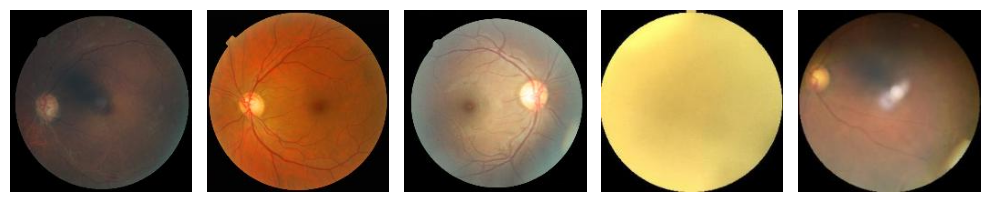

In [ ]:
sample_training, _ = next(train_generator)
plotimages(sample_training[:5])

# Now we start with building the Neural Networks
## Considerations:
- We are going to start building the simplest Neural Network since in each iteration of a new model we will add
- The number of epochs of each model is going to be constant (30)

At the end we are going to save the architecture and weigths of each model so in the end we can compare them.

## Visualization metrics function

In [16]:
def results_visualization(history):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1, 2) # Create de plots
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(10, 9)

    ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')

    ax[1].plot(epochs, train_loss, 'go-', label='Training loss')
    ax[1].plot(epochs, val_loss, 'ro-', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')

    plt.show()

## Callbacks

In [17]:
from tensorflow.keras.callbacks import Callback

def callback_best_model(name_version_model):
    callback_best_model = tf.keras.callbacks.ModelCheckpoint(
                            filepath = f'../results/{name_version_model}',
                            frequency = 'epoch',
                            save_best_only = True,
                            monitor = 'val_accuracy',
                            verbose = 1
                        )
    return callback_best_model

# Create a callback when the model accuracy in training data reached 0.90
class TrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') > 0.90:
            print('The model has reached the accuracy desired (0.90), stop the training!')
            self.model.stop_training = True

## Simplest Neural Network

In [18]:
# We are going to suppress the warnings to the console does not fill with information we do not need
# because these are mainly resources warnings of the GPU
import warnings
warnings.filterwarnings("ignore")

In [19]:
model_base = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Flatten(input_shape=(200,200,3)),

    # Layer 1
    tf.keras.layers.Dense(50, activation='relu'),

    # Layer 2
    tf.keras.layers.Dense(100, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(4, activation='softmax')
]
)

In [20]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 50)                6000050   
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 6005554 (22.91 MB)
Trainable params: 6005554 (22.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the model with the require settings
model_base.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history = model_base.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callback_best_model('simple_model.h5')]
)

Epoch 1/20
24/24 [==============================] - ETA: 0s - loss: 5.6401 - accuracy: 0.3568
Epoch 1: val_accuracy improved from -inf to 0.48016, saving model to ../results/simple_model.h5
24/24 [==============================] - 12s 450ms/step - loss: 5.6401 - accuracy: 0.3568 - val_loss: 1.5412 - val_accuracy: 0.4802
Epoch 2/20
24/24 [==============================] - ETA: 0s - loss: 1.0833 - accuracy: 0.5351
Epoch 2: val_accuracy improved from 0.48016 to 0.66667, saving model to ../results/simple_model.h5
24/24 [==============================] - 10s 401ms/step - loss: 1.0833 - accuracy: 0.5351 - val_loss: 0.9042 - val_accuracy: 0.6667
Epoch 3/20
24/24 [==============================] - ETA: 0s - loss: 0.8241 - accuracy: 0.6367
Epoch 3: val_accuracy did not improve from 0.66667
24/24 [==============================] - 10s 402ms/step - loss: 0.8241 - accuracy: 0.6367 - val_loss: 0.9261 - val_accuracy: 0.5952
Epoch 4/20
24/24 [==============================] - ETA: 0s - loss: 0.8760 -

In [23]:
results = model_base.evaluate(test_generator)

10/10 [==============================] - 3s 303ms/step - loss: 0.5975 - accuracy: 0.7299


### We have with this model an accuracy of 75% in the test data

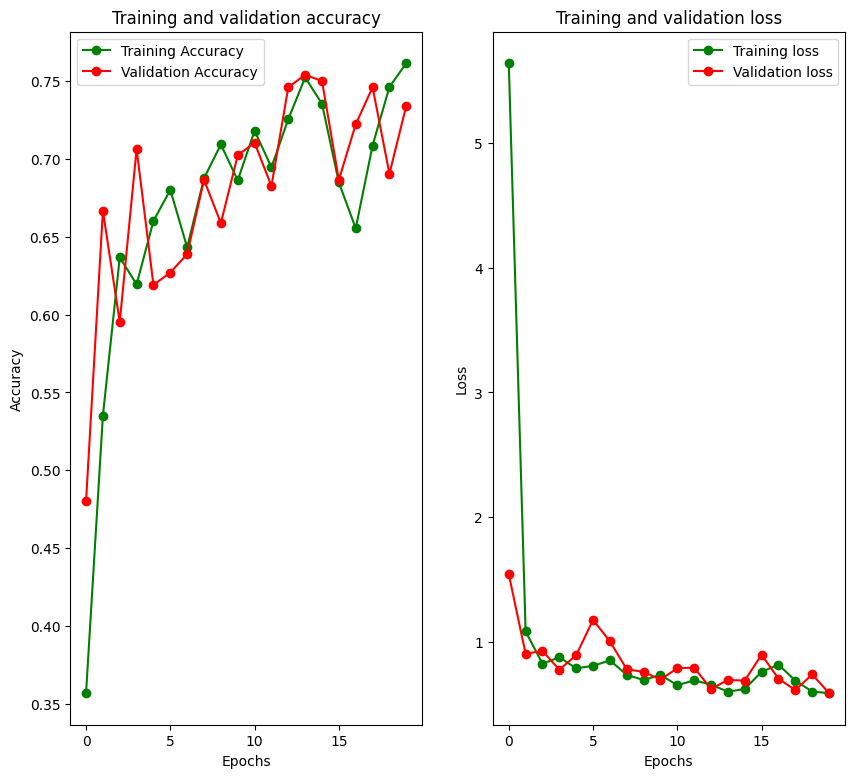

In [24]:
results_visualization(history)

#### In the plots above we can see that we have highest value in the validation accuracy metric was 75%, but we have some bias problems because the accuracy in the training data and validation data are distanced, this is not bad but we are going to try to make this metric better by adding some improvements to the model.

# Second model
In this model we are going to add some regularization like Dropout and regularizers to the layers to reduce the distance between the accuracy values of the training and validation data

In [25]:
model_optimize = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Flatten(input_shape=(200,200,3)),

    # Layer 1
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5) ), # Correlated values
    tf.keras.layers.Dropout(0.2), # "Turn off" the 20% of the neurons

    # Layer 2
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
    tf.keras.layers.Dropout(0.2), # "Turn off" the 20% of the neurons

    # Output Layer
    tf.keras.layers.Dense(4, activation='softmax')
]
)

model_optimize.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 120000)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               15360128  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 15394180 (58.72 MB)
Trainable params: 15

In [26]:
# Compile the model with the require settings
model_optimize.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
history_optimizer = model_optimize.fit(
    train_generator,
    epochs=20,
    validation_data = test_generator,
    callbacks=[callback_best_model('optimize_model.h5')]
)

Epoch 1/20
24/24 [==============================] - ETA: 0s - loss: 7.5746 - accuracy: 0.3514
Epoch 1: val_accuracy improved from -inf to 0.56082, saving model to ../results/optimize_model.h5
24/24 [==============================] - 22s 879ms/step - loss: 7.5746 - accuracy: 0.3514 - val_loss: 1.1374 - val_accuracy: 0.5608
Epoch 2/20
24/24 [==============================] - ETA: 0s - loss: 1.2250 - accuracy: 0.4415
Epoch 2: val_accuracy did not improve from 0.56082
24/24 [==============================] - 21s 857ms/step - loss: 1.2250 - accuracy: 0.4415 - val_loss: 1.1266 - val_accuracy: 0.4597
Epoch 3/20
24/24 [==============================] - ETA: 0s - loss: 1.1314 - accuracy: 0.4717
Epoch 3: val_accuracy did not improve from 0.56082
24/24 [==============================] - 28s 1s/step - loss: 1.1314 - accuracy: 0.4717 - val_loss: 1.0574 - val_accuracy: 0.4605
Epoch 4/20
24/24 [==============================] - ETA: 0s - loss: 1.1258 - accuracy: 0.4470
Epoch 4: val_accuracy did not i

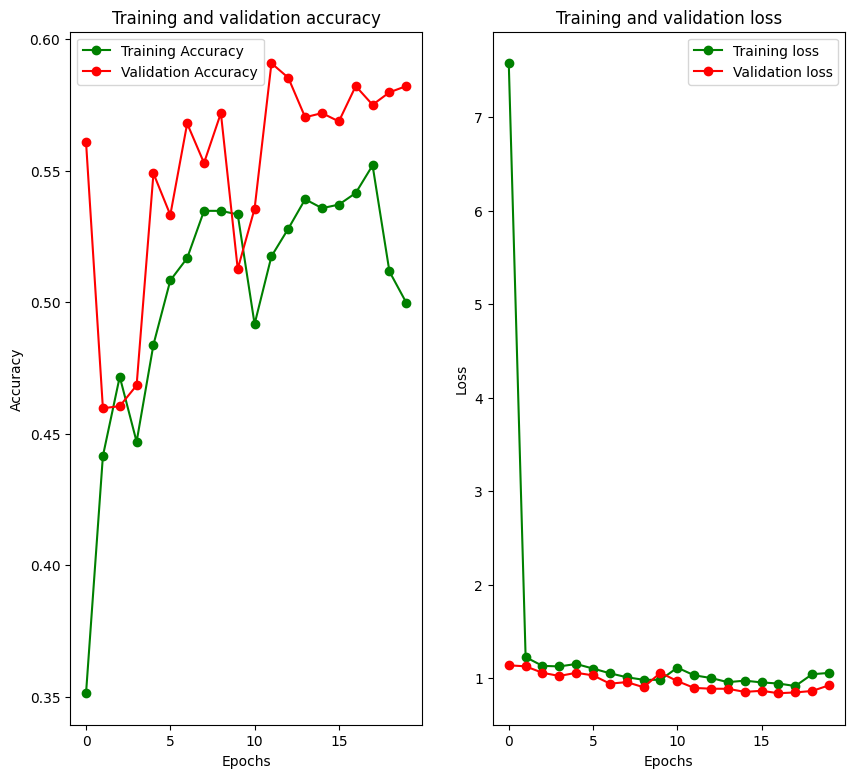

In [28]:
results_visualization(history_optimizer)

# Third model

Now we are going to apply a Convolutional Neural Network because this are images and a CNN is one of the best Neural Network for this case

In [29]:
cnn_model = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.Conv2D(40, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    # Layer 2
    tf.keras.layers.Conv2D(50, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # Layer 3
    tf.keras.layers.Conv2D(60, (3,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.1),

    # Layer 4
    tf.keras.layers.Conv2D(70,(3,3), kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.MaxPool2D((2,2)),

    # Flatten layer
    tf.keras.layers.Flatten(),

    # Output layer
    tf.keras.layers.Dense(4, activation='softmax')
])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 40)      1120      
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 40)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 50)        18050     
                                                                 
 dropout_2 (Dropout)         (None, 97, 97, 50)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 95, 95, 60)        27060     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 60)        0         
 g2D)                                                 

In [30]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
cnn_history = cnn_model.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_best_model('cnn_model.h5')],
    validation_data = validation_generator
)

Epoch 1/20
24/24 [==============================] - ETA: 0s - loss: 1.2747 - accuracy: 0.4314 
Epoch 1: val_accuracy improved from -inf to 0.48016, saving model to ../results/cnn_model.h5
24/24 [==============================] - 381s 16s/step - loss: 1.2747 - accuracy: 0.4314 - val_loss: 1.1772 - val_accuracy: 0.4802
Epoch 2/20
24/24 [==============================] - ETA: 0s - loss: 0.9626 - accuracy: 0.5608 
Epoch 2: val_accuracy improved from 0.48016 to 0.62698, saving model to ../results/cnn_model.h5
24/24 [==============================] - 382s 16s/step - loss: 0.9626 - accuracy: 0.5608 - val_loss: 0.9133 - val_accuracy: 0.6270
Epoch 3/20
24/24 [==============================] - ETA: 0s - loss: 0.8661 - accuracy: 0.6001 
Epoch 3: val_accuracy did not improve from 0.62698
24/24 [==============================] - 377s 16s/step - loss: 0.8661 - accuracy: 0.6001 - val_loss: 0.8761 - val_accuracy: 0.6071
Epoch 4/20
24/24 [==============================] - ETA: 0s - loss: 0.8052 - accur

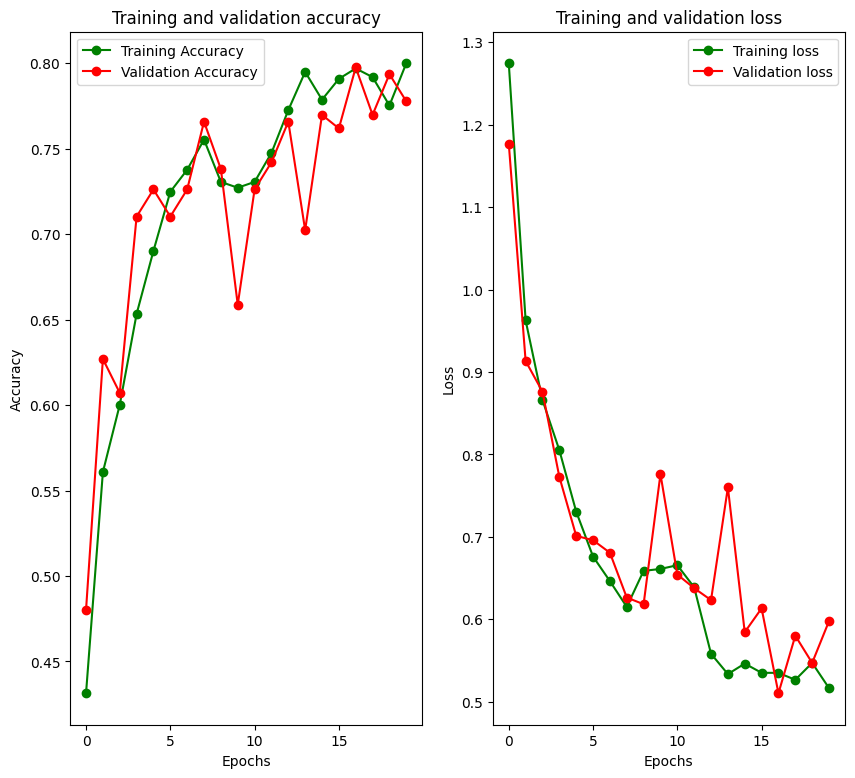

In [32]:
results_visualization(cnn_history)

# Model Tunning
### We can observe that this model outperforms the other but we can still do some hyperparameter tunning to the parameters so we can se witch model is the better for this data

In [34]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 21.0 MB/s eta 0:00:00


In [35]:
import keras_tuner as kt
from tensorflow import keras

Using TensorFlow backend


In [36]:
def model_constructor(hp):
    model = tf.keras.models.Sequential()

    # Input layer
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu', input_shape=(200,200,3)))
    model.add(tf.keras.layers.MaxPool2D((3,3)))
    model.add(tf.keras.layers.BatchNormalization())

    # The number of filters is going to be a variable in this case
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)

    hp_padding = hp.Choice('padding', values=['same', 'valid'])

    # Layer 2
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.BatchNormalization())

    # Layer 3
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu' ,kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
    model.add(tf.keras.layers.MaxPool2D((3,3)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.BatchNormalization())

    # Layer 4
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.BatchNormalization())

    # Layer 5
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.20))

    # Layer 6
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding=hp_padding, activation=None))
    model.add(tf.keras.layers.MaxPool2D((3,3)))
    model.add(tf.keras.layers.BatchNormalization())


    # Flatten layer
    model.add(tf.keras.layers.Flatten())

    # Output layer
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    # The number of the learning rate is going to be a variable in this case
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate), loss = 'categorical_crossentropy', metrics=['accuracy'])

    return model

In [37]:
# Set the tunner

tunner = kt.Hyperband(
    model_constructor,
    objective = 'val_accuracy',
    max_epochs=20,
    factor=3,
    directory='../results',
    project_name='eye-desease-tunner',
    overwrite=True
)

In [ ]:
# Make the search
tunner.search(
    train_generator,
    epochs=20,
    validation_data=validation_generator

)

best_hps = tunner.get_best_hyperparameters(num_trials=1)[0]

Trial 16 Complete [00h 37m 22s]
val_accuracy: 0.3730158805847168

Best val_accuracy So Far: 0.4404761791229248
Total elapsed time: 06h 27m 19s

Search: Running Trial #17

Value             |Best Value So Far |Hyperparameter
128               |128               |units
same              |same              |padding
0.001             |0.001             |learning_rate
20                |7                 |tuner/epochs
7                 |3                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
2                 |1                 |tuner/round
0013              |0006              |tuner/trial_id

Epoch 8/20
24/24 [==============================] - 619s 26s/step - loss: 1.1723 - accuracy: 0.7265 - val_loss: 3.9102 - val_accuracy: 0.4325
Epoch 9/20
24/24 [==============================] - 603s 25s/step - loss: 1.0247 - accuracy: 0.7381 - val_loss: 2.4834 - val_accuracy: 0.3770
Epoch 10/20
24/24 [==============================] - 620s 26s/step - loss: 0.8925 - a

In [ ]:
# Get the best configuration of the model that give the highest accuracy

print('The Hyperparameters that give the highest accuracy are:')

print(f"Units: {best_hps.get('units')}")

print(f"Learining rate: {best_hps.get('learning_rate')}")

In [ ]:
# The model with the highest accuracy after the tunning  process

hypermodel = tunner.hypermodel.build(best_hps)

hypermodel.summary()

In [ ]:
# Now that we have the that give us the highesr val_accuracy, we are going to train the model with those hyper parameters
history_hypermodel = hypermodel.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks = [callback_best_model('tunnig_model.h5')]
)

In [ ]:
results_visualization(history_hypermodel)

### We have reached a good model that in the best epoch the accuracy for the test set was 87.92%, so we are going to save the model

In [ ]:
print(f'Accuracy in the validation set: {hypermodel.evaluate(test_generator)[1]}')

# Load the model

In [ ]:
# Load the best model
tunning_model = tf.keras.models.load_model('../results/tunnig_model.h5')

In [ ]:
print(f'Accuracy in the validation set: {tunning_model.evaluate(test_generator)[1]}')

### That last model give us the best accuracy in the validation dataset so far